In [5]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

#sklearn imports
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
#bring in the clean chicago dataset
chi_df = pd.read_csv('../data/chi_df_cleaned.csv')
chi_df.head()

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),number,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,year,month,week,start_time_ep,end_time_ep,weather_timestamp_ep,accident_duration,side_R,side_nan,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Night,astronomical_twilight_nan,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_nan,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_nan
0,2,42.305960,-87.960150,42.306916,-87.960918,0.077,2.0,37.0,31.0,79.0,29.59,10.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,11,48,1.480517e+09,1.480539e+09,1.480518e+09,21600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,42.175870,-88.135770,42.174620,-88.135794,0.086,2.0,37.0,28.1,76.0,29.62,10.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,11,48,1.480518e+09,1.480540e+09,1.480518e+09,21600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### K-Means Clustering to start

In [6]:
chi_df.columns

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'number', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)',
       ...
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_nan'],
      dtype='object', length=156)

In [10]:
##### WHAT ARE THE FEATURES WE ARE INTERESTED IN CHECKING FOR CLUSTERING????

''

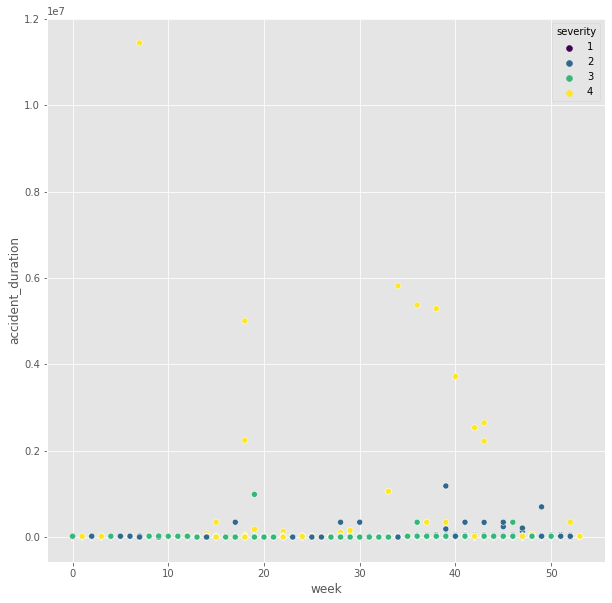

In [13]:
#initial scatter to look at week and accident duration through severity of the accident
plt.figure(figsize=(10,10))

sns.scatterplot(data=chi_df, 
               x= 'week',
               y= 'accident_duration',
               hue='severity',
               palette='viridis')
;

In [19]:
#started with a simply cluster attempt
features = ['week', 'accident_duration', 'distance(mi)']

In [18]:
X = chi_df[features]
X.head()

,week,accident_duration,distance(mi)
0,48,21600.0,0.077
1,48,21600.0,0.086
2,48,22524.0,0.089
3,48,21600.0,0.003
4,48,21600.0,0.000


In [20]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [21]:
#start with the basic model parameters, can gridsearch over this later if we want/need
km = KMeans()
km.fit(X_sc)

KMeans()

In [22]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
km.cluster_centers_

array([[-1.21297750e-01, -2.87836183e-02, -1.88866577e-01],
       [ 1.16394117e+00,  8.05387466e-03, -9.35778607e-02],
       [ 5.60187909e-01,  4.53905491e+01,  1.18649887e+00],
       [ 2.23080864e-01, -2.16476884e-03,  8.47808831e+00],
       [ 2.19356921e-01, -2.10314491e-02,  2.52922034e+00],
       [-1.18087609e+00, -1.81911315e-02, -1.20840823e-01],
       [ 5.53791905e-01, -1.03661983e-01,  3.66485065e+01],
       [-1.29785132e+00,  1.34456632e+02,  3.37480997e-01]])

In [24]:
#slihouette score
silhouette_score(X_sc, km.labels_)

0.4381942534150564

#### Silhouette Score Interpretation
* A score of .4382 isn't horrible, but its also not great. We'd prefer it to be closer to 1 than 0.

#### Visualize the clustering

In [26]:
X['cluster'] = km.labels_
X.head()

<ipython-input-26-e29420a47ae3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = km.labels_


,week,accident_duration,distance(mi),cluster
0,48,21600.0,0.077,1
1,48,21600.0,0.086,1
2,48,22524.0,0.089,1
3,48,21600.0,0.003,1
4,48,21600.0,0.000,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


''

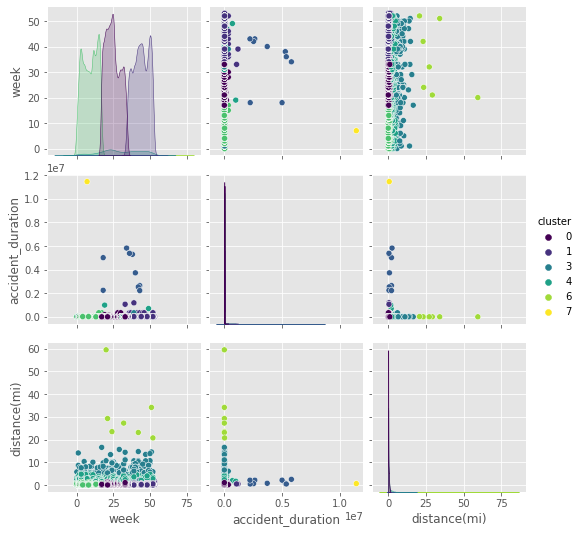

In [27]:
sns.pairplot(data= X, hue= 'cluster', palette='viridis')
;

In [29]:
#Clustering that we would hope would be similar to the severity from the overall DF
X['cluster'].value_counts(normalize=True) , chi_df['severity'].value_counts(normalize=True)

(0    0.340823
 1    0.325843
 5    0.293802
 4    0.034954
 3    0.004161
 2    0.000220
 6    0.000171
 7    0.000024
 Name: cluster, dtype: float64,
 3    0.507049
 2    0.413032
 4    0.073873
 1    0.006046
 Name: severity, dtype: float64)

In [30]:
#Now lets try with 4 clusters the same number of classes as severity
km = KMeans(n_clusters=4)
km.fit(X_sc)

KMeans(n_clusters=4)

In [31]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
km.cluster_centers_

array([[ 9.59811048e-01,  1.90195660e-02, -5.75690685e-02],
       [-7.78428931e-01, -3.37879144e-02, -1.22212471e-01],
       [ 2.22305537e-01, -2.47082460e-02,  4.99295047e+00],
       [ 1.68432651e-01,  7.16956079e+01,  1.04702873e+00]])

In [35]:
X['cluster'] = km.labels_
X.head()

<ipython-input-35-e29420a47ae3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = km.labels_


,week,accident_duration,distance(mi),cluster
0,48,21600.0,0.077,0
1,48,21600.0,0.086,0
2,48,22524.0,0.089,0
3,48,21600.0,0.003,0
4,48,21600.0,0.000,0


In [37]:
X['cluster'].value_counts(normalize=True) , chi_df['severity'].value_counts(normalize=True)

(1    0.544451
 0    0.437069
 2    0.018334
 3    0.000147
 Name: cluster, dtype: float64,
 3    0.507049
 2    0.413032
 4    0.073873
 1    0.006046
 Name: severity, dtype: float64)

In [38]:
silhouette_score(X_sc, km.labels_)

0.5167786701582239